<a href="https://colab.research.google.com/github/Mino94/malicious_pdf_classification/blob/main/%EC%95%85%EC%84%B1%EC%BD%94%EB%93%9C_%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8_%EA%B9%80%EB%AF%BC%ED%98%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/MyDrive/data

/content/gdrive/MyDrive/data


In [3]:
%pwd

'/content/gdrive/MyDrive/data'

In [4]:
# !unzip -P "infected" "pdf_sample.zip"

In [5]:
!ls

final_pdf_parsing_success.csv  pdf_parsing_success3.csv  pdf_title2.csv
pdf_benign_6667.csv	       pdf_parsing_success.csv	 pdf_title.csv
pdfid			       pdf_samples		 pdf_title_success.csv
pdf_malicious_2899.csv	       pdf_samples_info.csv	 target-directory
pdf_parsing_success2.csv       pdf_sample.zip


# 데이터 불러오기

## pdf parsing csv 파일

In [6]:
import pandas as pd

df = pd.read_csv('./final_pdf_parsing_success.csv')

df

,Unnamed: 0,sha256,obj,endobj,stream,endstream,xref,trailer,startxref,/Page,/Encrypt,/ObjStm,/JS,/JavaScript,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/Colors > 2^24
0,0,8b7494a8141da134442238a8a19c27a10dbe5cf3e01ca4...,104,104,81,81,0,0,2,20,2,7,0,0,0,0,0,0,0,0,0,0,0
1,1,8b45878de057a5773d3da8185eb5386b48350a4764745e...,62,62,19,19,2,2,2,10,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,8b214cdae470d068a8e9116f1a39f3b9dadc1a365de21b...,104,104,93,93,0,0,3,8,0,10,0,0,0,0,0,0,0,0,0,0,0
3,3,8b75c04d69844d1d2dd4eaaf095156a81ae3d69304995e...,31,31,9,9,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,8b7f5d4b85ac2708678b07413059a839e926105736c466...,78,78,74,74,0,0,1,0,1,21,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10609,10609,2bc5e646bfd609b0073a3be8a75a8ed42140296a10626a...,52,52,8,8,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
10610,10610,3a1ccab34d9dd91f542db38ac757cc7ec183ea4295d858...,49,49,8,8,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
10611,10611,3af0755a954285ceb45a87c8068b7a694980190fb718d7...,53,53,8,8,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
10612,10612,483b653c4f85219d169dbc49ae0d811e3b55dbe800a0dc...,53,53,10,10,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df= df.drop(['Unnamed: 0'], axis=1)

In [8]:
df.head()

,sha256,obj,endobj,stream,endstream,xref,trailer,startxref,/Page,/Encrypt,/ObjStm,/JS,/JavaScript,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/Colors > 2^24
0,8b7494a8141da134442238a8a19c27a10dbe5cf3e01ca4...,104,104,81,81,0,0,2,20,2,7,0,0,0,0,0,0,0,0,0,0,0
1,8b45878de057a5773d3da8185eb5386b48350a4764745e...,62,62,19,19,2,2,2,10,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8b214cdae470d068a8e9116f1a39f3b9dadc1a365de21b...,104,104,93,93,0,0,3,8,0,10,0,0,0,0,0,0,0,0,0,0,0
3,8b75c04d69844d1d2dd4eaaf095156a81ae3d69304995e...,31,31,9,9,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8b7f5d4b85ac2708678b07413059a839e926105736c466...,78,78,74,74,0,0,1,0,1,21,0,0,0,1,0,0,0,0,0,0,0


In [9]:
!ls

final_pdf_parsing_success.csv  pdf_parsing_success3.csv  pdf_title2.csv
pdf_benign_6667.csv	       pdf_parsing_success.csv	 pdf_title.csv
pdfid			       pdf_samples		 pdf_title_success.csv
pdf_malicious_2899.csv	       pdf_samples_info.csv	 target-directory
pdf_parsing_success2.csv       pdf_sample.zip


## labeling 된 csv 파일

In [10]:
benign_df = pd.read_csv('./pdf_benign_6667.csv')

benign_df.head()

,Unnamed: 0,filetype,vt_total,sha256,size,vt_cache,vt_positives,tags
0,3430,pdf,63.0,472a39ef46ff037ed86998df89fb7b00cac49e8a3bab49...,1307522.0,1.0,0.0,"2020.11.30, benign, vt"
1,3431,pdf,62.0,47306b179b56917bbe328da41550f29ef24c18e7061708...,262373.0,1.0,0.0,"2020.12.08, benign, vt"
2,3436,pdf,59.0,486794494805a110736ee8f63d011ab275ca578f9d02c1...,265745.0,1.0,0.0,"benign, vt, 2020.11.17"
3,3445,pdf,61.0,4c34648efff32d0bb8a66ddb7e632b24b2588d4398d555...,9533230.0,1.0,0.0,"benign, 2021.01.08, vt"
4,3451,pdf,63.0,4f93591007cf9c081cc43c4baebb4e76ed7abff97134c5...,6937309.0,1.0,0.0,"2020.11.30, benign, vt"


In [11]:
malicious_df = pd.read_csv('./pdf_malicious_2899.csv')

malicious_df.head()

,Unnamed: 0,tags,filetype,vt_total,sha256,size,vt_cache,vt_positives
0,9,"check_result, malicious",pdf,58.0,71df69151896a44dd18369d08cf25414bd36fbaa7fab9f...,41560.0,1.0,32.0
1,15,"check_result, malicious",pdf,58.0,4c68f9baf2e8a1038cf2510981868ab4b64c29d0d260fb...,46056.0,1.0,30.0
2,19,"check_result, malicious",pdf,55.0,21f8962d881a31898905e04dfc983f9009d5a582383c8d...,13769.0,1.0,21.0
3,20,"check_result, malicious",pdf,58.0,082c30aa855a3738825e7b8f2b5d68cdc79cd8a4c757de...,52273.0,1.0,27.0
4,72,"check_result,malicious",pdf,60.0,cede081fa1ecc6942859d49da9baacad0aaf81cba5ceff...,375809.0,1.0,31.0


# 데이터 전처리

benign : 0

malicious : 1

filetype 삭제

In [12]:
benign_df['tags'] = 0

benign_df.head()

,Unnamed: 0,filetype,vt_total,sha256,size,vt_cache,vt_positives,tags
0,3430,pdf,63.0,472a39ef46ff037ed86998df89fb7b00cac49e8a3bab49...,1307522.0,1.0,0.0,0
1,3431,pdf,62.0,47306b179b56917bbe328da41550f29ef24c18e7061708...,262373.0,1.0,0.0,0
2,3436,pdf,59.0,486794494805a110736ee8f63d011ab275ca578f9d02c1...,265745.0,1.0,0.0,0
3,3445,pdf,61.0,4c34648efff32d0bb8a66ddb7e632b24b2588d4398d555...,9533230.0,1.0,0.0,0
4,3451,pdf,63.0,4f93591007cf9c081cc43c4baebb4e76ed7abff97134c5...,6937309.0,1.0,0.0,0


In [14]:
benign_df=benign_df.drop(['Unnamed: 0', 'filetype'], axis=1)
benign_df.head()

,vt_total,sha256,size,vt_cache,vt_positives,tags
0,63.0,472a39ef46ff037ed86998df89fb7b00cac49e8a3bab49...,1307522.0,1.0,0.0,0
1,62.0,47306b179b56917bbe328da41550f29ef24c18e7061708...,262373.0,1.0,0.0,0
2,59.0,486794494805a110736ee8f63d011ab275ca578f9d02c1...,265745.0,1.0,0.0,0
3,61.0,4c34648efff32d0bb8a66ddb7e632b24b2588d4398d555...,9533230.0,1.0,0.0,0
4,63.0,4f93591007cf9c081cc43c4baebb4e76ed7abff97134c5...,6937309.0,1.0,0.0,0


In [15]:
malicious_df.vt_cache.value_counts()

0.0    2056
1.0     843
Name: vt_cache, dtype: int64

In [16]:
malicious_df=malicious_df.drop(['Unnamed: 0', 'filetype'], axis=1)
malicious_df.head()

,tags,vt_total,sha256,size,vt_cache,vt_positives
0,"check_result, malicious",58.0,71df69151896a44dd18369d08cf25414bd36fbaa7fab9f...,41560.0,1.0,32.0
1,"check_result, malicious",58.0,4c68f9baf2e8a1038cf2510981868ab4b64c29d0d260fb...,46056.0,1.0,30.0
2,"check_result, malicious",55.0,21f8962d881a31898905e04dfc983f9009d5a582383c8d...,13769.0,1.0,21.0
3,"check_result, malicious",58.0,082c30aa855a3738825e7b8f2b5d68cdc79cd8a4c757de...,52273.0,1.0,27.0
4,"check_result,malicious",60.0,cede081fa1ecc6942859d49da9baacad0aaf81cba5ceff...,375809.0,1.0,31.0


In [17]:
malicious_df['tags'] = 1

malicious_df.head()

,tags,vt_total,sha256,size,vt_cache,vt_positives
0,1,58.0,71df69151896a44dd18369d08cf25414bd36fbaa7fab9f...,41560.0,1.0,32.0
1,1,58.0,4c68f9baf2e8a1038cf2510981868ab4b64c29d0d260fb...,46056.0,1.0,30.0
2,1,55.0,21f8962d881a31898905e04dfc983f9009d5a582383c8d...,13769.0,1.0,21.0
3,1,58.0,082c30aa855a3738825e7b8f2b5d68cdc79cd8a4c757de...,52273.0,1.0,27.0
4,1,60.0,cede081fa1ecc6942859d49da9baacad0aaf81cba5ceff...,375809.0,1.0,31.0


In [18]:
labeling_df = pd.concat([benign_df, malicious_df])

labeling_df

,vt_total,sha256,size,vt_cache,vt_positives,tags
0,63.0,472a39ef46ff037ed86998df89fb7b00cac49e8a3bab49...,1307522.0,1.0,0.0,0
1,62.0,47306b179b56917bbe328da41550f29ef24c18e7061708...,262373.0,1.0,0.0,0
2,59.0,486794494805a110736ee8f63d011ab275ca578f9d02c1...,265745.0,1.0,0.0,0
3,61.0,4c34648efff32d0bb8a66ddb7e632b24b2588d4398d555...,9533230.0,1.0,0.0,0
4,63.0,4f93591007cf9c081cc43c4baebb4e76ed7abff97134c5...,6937309.0,1.0,0.0,0
...,...,...,...,...,...,...
2894,0.0,f58e7ade32ed019ec03e426417f57e55bef339e597f7e4...,82237.0,0.0,0.0,1
2895,0.0,4ab0b160b8508b6d28ab7f1a618f8fbd079c9eb19d1b4f...,72618.0,0.0,0.0,1
2896,0.0,84f48e77786cb48de7c74c2d4042315d424fe6c03a89db...,86040.0,0.0,0.0,1
2897,0.0,d1472278890b25a8d26baa03a06f2e5965aec65d0c673e...,70602.0,0.0,0.0,1


In [19]:
df.shape, labeling_df.shape

((10614, 22), (9566, 6))

# EDA

In [20]:
model_df = pd.merge(df, labeling_df, left_on='sha256', right_on='sha256', how='inner')
model_df.head()

,sha256,obj,endobj,stream,endstream,xref,trailer,startxref,/Page,/Encrypt,/ObjStm,/JS,/JavaScript,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/Colors > 2^24,vt_total,size,vt_cache,vt_positives,tags
0,8b7494a8141da134442238a8a19c27a10dbe5cf3e01ca4...,104,104,81,81,0,0,2,20,2,7,0,0,0,0,0,0,0,0,0,0,0,0.0,635958.0,1.0,0.0,0
1,8b45878de057a5773d3da8185eb5386b48350a4764745e...,62,62,19,19,2,2,2,10,0,1,0,0,0,0,0,0,0,0,0,0,0,56.0,239914.0,1.0,0.0,0
2,8b214cdae470d068a8e9116f1a39f3b9dadc1a365de21b...,104,104,93,93,0,0,3,8,0,10,0,0,0,0,0,0,0,0,0,0,0,0.0,989007.0,1.0,0.0,0
3,8b75c04d69844d1d2dd4eaaf095156a81ae3d69304995e...,31,31,9,9,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,59160.0,1.0,0.0,0
4,8b7f5d4b85ac2708678b07413059a839e926105736c466...,78,78,74,74,0,0,1,0,1,21,0,0,0,1,0,0,0,0,0,0,0,0.0,645743.0,1.0,0.0,0


In [25]:
model_df.to_csv('model_data_set.csv')

In [21]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9441 entries, 0 to 9440
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sha256          9441 non-null   object 
 1   obj             9441 non-null   int64  
 2   endobj          9441 non-null   int64  
 3   stream          9441 non-null   int64  
 4   endstream       9441 non-null   int64  
 5   xref            9441 non-null   int64  
 6   trailer         9441 non-null   int64  
 7   startxref       9441 non-null   int64  
 8   /Page           9441 non-null   int64  
 9   /Encrypt        9441 non-null   int64  
 10  /ObjStm         9441 non-null   int64  
 11  /JS             9441 non-null   int64  
 12  /JavaScript     9441 non-null   int64  
 13  /AA             9441 non-null   int64  
 14  /OpenAction     9441 non-null   int64  
 15  /AcroForm       9441 non-null   int64  
 16  /JBIG2Decode    9441 non-null   int64  
 17  /RichMedia      9441 non-null   i

In [22]:
model_df.describe()

,obj,endobj,stream,endstream,xref,trailer,startxref,/Page,/Encrypt,/ObjStm,/JS,/JavaScript,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/Colors > 2^24,vt_total,size,vt_cache,vt_positives,tags
count,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9.441000e+03,9441.000000,9441.000000,9441.000000
mean,497.388200,497.145218,207.773859,207.246796,1.291283,1.292024,1.618155,26.072556,0.040462,6.404512,0.174028,0.131236,0.093952,0.256647,0.104650,0.502171,0.000106,0.046393,0.043957,0.005614,0.000106,22.061222,1.408601e+06,0.786463,2.381316,0.300498
std,2660.227068,2659.986186,1578.409607,1578.144359,1.161757,1.147948,1.120043,136.660612,0.257626,40.780043,3.599156,3.596703,1.406841,0.504130,0.440604,16.727851,0.010292,2.932425,0.540593,0.076123,0.010292,28.486885,4.645756e+06,0.409825,8.477895,0.458499
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.830000e+02,0.000000,0.000000,0.000000
25%,40.000000,39.000000,7.000000,7.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.611500e+04,1.000000,0.000000,0.000000
50%,69.000000,69.000000,23.000000,23.000000,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.214560e+05,1.000000,0.000000,0.000000
75%,203.000000,203.000000,91.000000,91.000000,2.000000,2.000000,2.000000,14.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,9.746910e+05,1.000000,0.000000,1.000000
max,102532.000000,102530.000000,85934.000000,85934.000000,35.000000,35.000000,48.000000,7725.000000,6.000000,1557.000000,267.000000,268.000000,88.000000,22.000000,22.000000,1067.000000,1.000000,283.000000,24.000000,2.000000,1.000000,64.000000,1.721597e+08,1.000000,44.000000,1.000000


## Base line

In [23]:
model_df.tags.value_counts(normalize=True)

0    0.699502
1    0.300498
Name: tags, dtype: float64

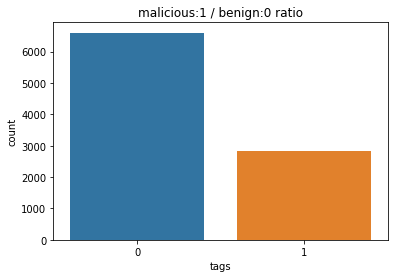

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

sns.countplot(x="tags", data=model_df)
plt.title("malicious:1 / benign:0 ratio")
plt.show()

# modeling